# Regression using SciKitLearn
In this tutorial we are going to use an already clean dataset from the [Nomadlist Cities](https://nomadlist.com/) data to predict the continent where the city is located.

We are using [ScikitLearn library](https://scikit-learn.org/stable/index.html)

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# Import standard Libraries
import pandas as pd
import seaborn as sns
import altair as alt

sns.set(rc={'figure.figsize':(10,10)})
print("imports ok")

imports ok




```
# This is formatted as code
```

## Loading and selecting the data



Mounted at /content/gdrive


In [3]:
# Load data
#data = pd.read_csv('/content/gdrive/MyDrive/AIA_Data_Encoding/data_set/dataset_clean_02.csv')
#data = pd.read_csv('/content/gdrive/MyDrive/AIA_Data_Encoding/v1/data/data_trash/data_v1_2_clean_a.csv')
#data = pd.read_csv('/content/gdrive/MyDrive/AIA_Data_Encoding/v1/data/data_trash/data_v1_v6_clean_a.csv')
data = pd.read_csv('/content/gdrive/MyDrive/AIA_Data_Encoding/v1/data/V1_c.csv')

print(data)

          area  clean_area  per_clean_area  steps      time  height  width  \
0     0.810000    0.258896        0.319624      6  1.986396    1.00   1.00   
1     0.785097    0.252604        0.321748      6  1.855302    1.00   1.00   
2     0.760788    0.246393        0.323866      6  1.818197    1.00   1.00   
3     0.737072    0.240276        0.325987      6  1.792320    1.00   1.00   
4     0.713946    0.234263        0.328125      6  1.745758    1.00   1.00   
...        ...         ...             ...    ...       ...     ...    ...   
4995  2.614227    0.853687        0.326554      7  2.685913    3.97   1.99   
4996  2.618085    0.863552        0.329841      7  2.744154    3.97   1.99   
4997  2.626248    0.874723        0.333070      8  2.781338    3.97   1.99   
4998  2.638689    0.887238        0.336242      7  3.356311    3.97   1.99   
4999  2.655400    0.901098        0.339346      7  3.167035    3.97   1.99   

          x_a   x_b      x_c  x_d  y_a     y_b   y_c     y_d   

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area            5000 non-null   float64
 1   clean_area      5000 non-null   float64
 2   per_clean_area  5000 non-null   float64
 3   steps           5000 non-null   int64  
 4   time            5000 non-null   float64
 5   height          5000 non-null   float64
 6   width           5000 non-null   float64
 7   x_a             5000 non-null   float64
 8   x_b             5000 non-null   float64
 9   x_c             5000 non-null   float64
 10  x_d             5000 non-null   int64  
 11  y_a             5000 non-null   int64  
 12  y_b             5000 non-null   float64
 13  y_c             5000 non-null   float64
 14  y_d             5000 non-null   float64
 15  p_a             5000 non-null   float64
 16  p_b             5000 non-null   float64
 17  p_c             5000 non-null   f

## Predicting the Time


Prepare data

In [5]:
# Select the (independant) features that we are going to use to train the model
#area  clean_area  per_clean_area  curve_length  steps
#X = data.loc[:,'steps':'clean_area']
#X = data.loc[:, 'area':'steps']
X = data[['area', 'clean_area', 'per_clean_area', 'time','steps']]

In [6]:
X = X.drop(columns='time')

In [7]:
X.head()

,area,clean_area,per_clean_area,steps
0,0.810000,0.258896,0.319624,6
1,0.785097,0.252604,0.321748,6
2,0.760788,0.246393,0.323866,6
3,0.737072,0.240276,0.325987,6
4,0.713946,0.234263,0.328125,6


In [8]:
# Load and instantiate a StandardSclaer 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

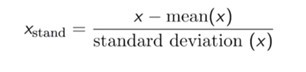

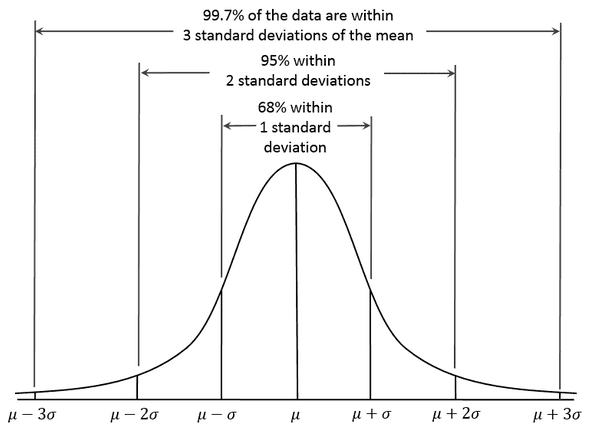

In [9]:
# Apply the scaler to our X-features
X_scaled = scaler.fit_transform(X)

In [10]:
print(X_scaled)

[[-1.22253103 -1.38429512  0.57566676 -0.69256753]
 [-1.24099988 -1.42195997  0.59264522 -0.69256753]
 [-1.25902843 -1.45913632  0.60957227 -0.69256753]
 ...
 [ 0.12447198  2.30210464  0.68314754  0.00969117]
 [ 0.13369851  2.3770174   0.70850753 -0.34143818]
 [ 0.146092    2.45998622  0.73331809 -0.34143818]]


In [11]:
X_scaled_df = pd.DataFrame(X_scaled)

In [12]:
print(X_scaled_df)

             0         1         2         3
0    -1.222531 -1.384295  0.575667 -0.692568
1    -1.241000 -1.421960  0.592645 -0.692568
2    -1.259028 -1.459136  0.609572 -0.692568
3    -1.276618 -1.495757  0.626528 -0.692568
4    -1.293769 -1.531747  0.643620 -0.692568
...        ...       ...       ...       ...
4995  0.115556  2.176181  0.631065 -0.341438
4996  0.118418  2.235229  0.657338 -0.341438
4997  0.124472  2.302105  0.683148  0.009691
4998  0.133699  2.377017  0.708508 -0.341438
4999  0.146092  2.459986  0.733318 -0.341438

[5000 rows x 4 columns]


In [13]:
# Define the dependant variable / target to predict 
y_reg = data.time

In [14]:
#Split the data using the train_test_split module. We keep 20% of the data for testing and use 80% to train the model
# Random state defined with an arbitrary number for reproducibility
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, data_train, data_test = train_test_split(X_scaled, y_reg, data, test_size = 0.25, random_state = 45)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(3750, 4)
(1250, 4)
(3750,)


Train model

In [16]:
# Import and instantiate the baseline model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Model training
model.fit(X_train, y_train)

# Model performance on the test-set / This score is R^2
print(model.score(X_test, y_test))

0.9679723312449333


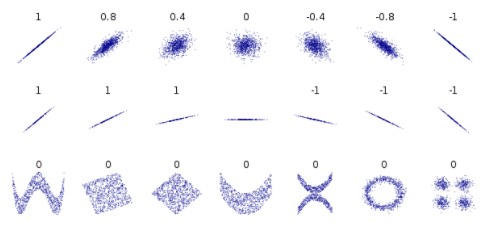

more info about the model class here https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [17]:
print("Coefficient", model.coef_, "intercetp",  model.intercept_)

Coefficient [ 1.41893381 -0.22976747  0.25431155  0.73866623] intercetp 3.149591801574184


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


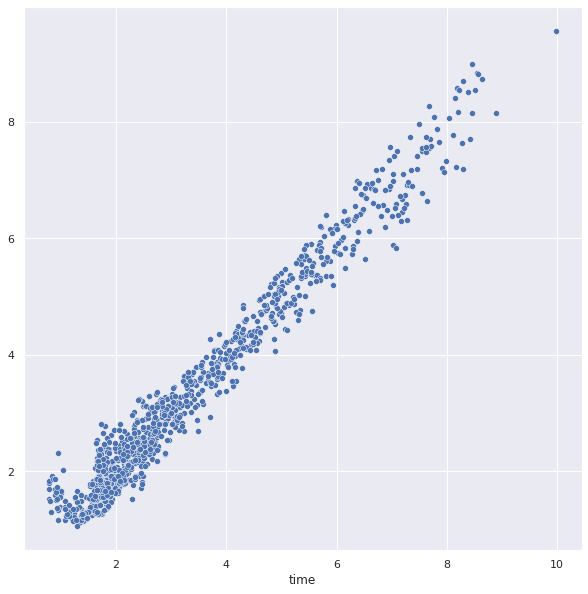

In [18]:
# We can also inspect our results visually
y_pred = model.predict(X_test)

sns.scatterplot(y_test,y_pred)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


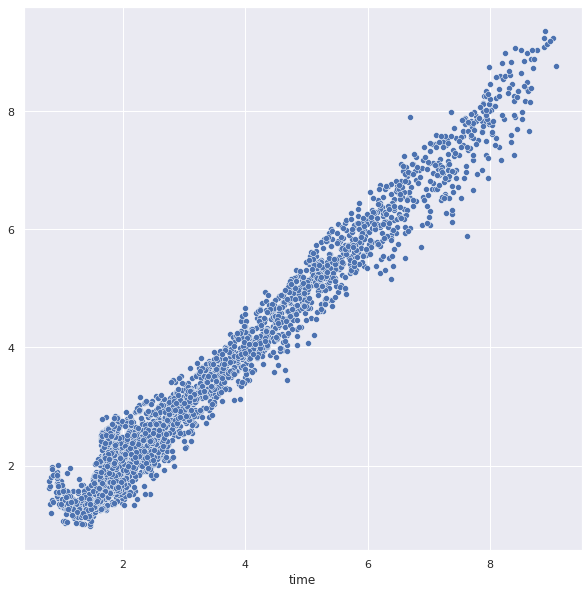

In [19]:
# We can also inspect our results visually
y_pred_train = model.predict(X_train)

sns.scatterplot(y_train,y_pred_train)

In [20]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1250 entries, 4988 to 1012
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area            1250 non-null   float64
 1   clean_area      1250 non-null   float64
 2   per_clean_area  1250 non-null   float64
 3   steps           1250 non-null   int64  
 4   time            1250 non-null   float64
 5   height          1250 non-null   float64
 6   width           1250 non-null   float64
 7   x_a             1250 non-null   float64
 8   x_b             1250 non-null   float64
 9   x_c             1250 non-null   float64
 10  x_d             1250 non-null   int64  
 11  y_a             1250 non-null   int64  
 12  y_b             1250 non-null   float64
 13  y_c             1250 non-null   float64
 14  y_d             1250 non-null   float64
 15  p_a             1250 non-null   float64
 16  p_b             1250 non-null   float64
 17  p_c             1250 non-null 

In [21]:
data_test['time_pred'] = y_pred

alt.Chart(data_test).mark_circle(size=35).encode(
    x='time',
    y='time_pred',
    color=alt.Color('steps', scale=alt.Scale(scheme='category10')),
    tooltip=['steps', 'clean_area']
).interactive()

alt.Chart(...)

Let's try a different model class

In [22]:
# Import and instantiate a XGBoost Regressor
import xgboost as xgb
model = xgb.XGBRegressor()

# Model training
model.fit(X_train, y_train)

# Model performance on the test-set / This score is not accacy but a R^2
print(model.score(X_test, y_test))

[18:27:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9871792765302982


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


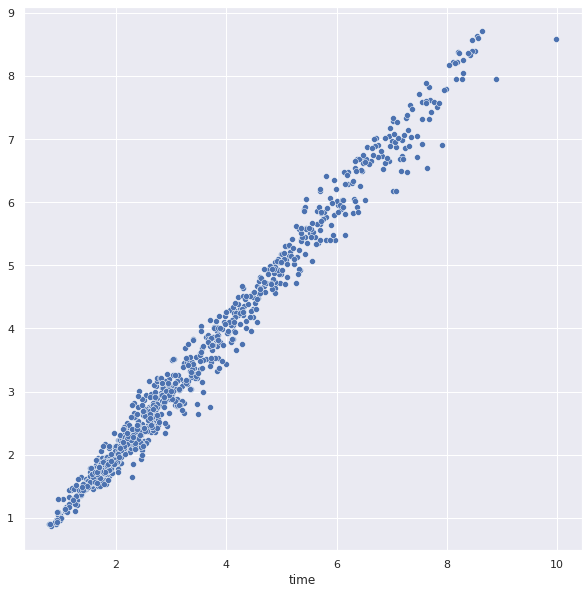

In [23]:
# We can also inspect our results visually
y_pred = model.predict(X_test)

sns.scatterplot(y_test,y_pred)

In [24]:
data_test['time_predXG'] = y_pred

alt.Chart(data_test).mark_circle(size=50).encode(
    x='time',
    y='time_predXG',
    color=alt.Color('steps', scale=alt.Scale(scheme='category10')),
    tooltip=['steps', 'clean_area']
).interactive()

alt.Chart(...)

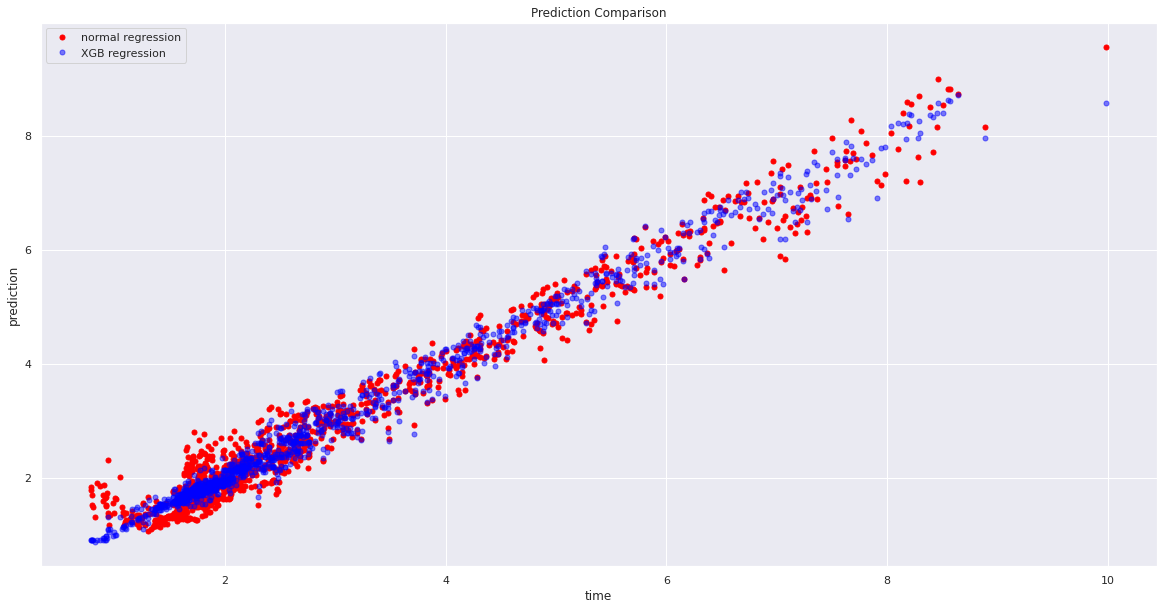

In [25]:
#Comparative plot
import matplotlib.pyplot as plt


fig, ax1 = plt.subplots()
ax1.plot(data_test["time"], data_test["time_pred"], color = "red", label = "normal regression",linestyle='None', marker = "o", markersize = 5)
ax1.plot(data_test["time"], data_test["time_predXG"], color = "blue", label = "XGB regression",linestyle='None',marker = "o", markersize = 5, alpha= 0.5)


ax1.set_xlabel('time')
ax1.set_ylabel('prediction')
ax1.legend()
fig.set_figheight(10)
fig.set_figwidth(20)

plt.title('Prediction Comparison')
plt.show()

In [26]:
from sklearn.kernel_ridge import KernelRidge
model = KernelRidge(kernel="polynomial", degree=3)


model = model.fit(X_train, y_train)

print(model.score(X_test, y_test))

0.9850316706339624


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


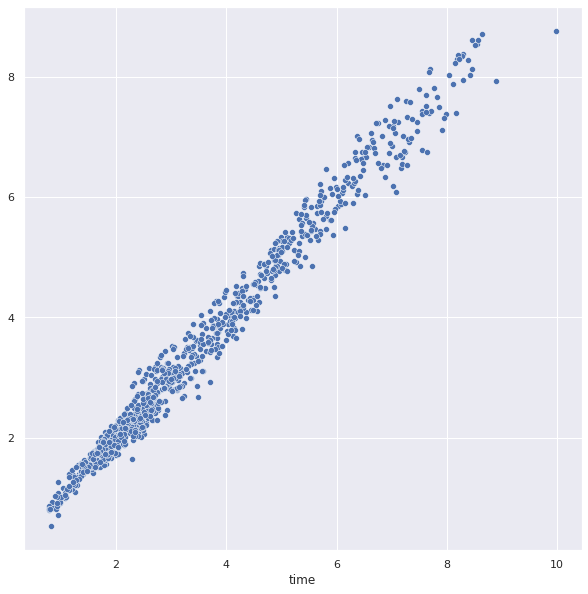

In [27]:
# We can also inspect our results visually
y_pred = model.predict(X_test)

sns.scatterplot(y_test,y_pred)

In [29]:
data_test['time_pred_ply'] = y_pred

alt.Chart(data_test).mark_circle(size=50).encode(
    x='time',
    y='time_pred_ply',
    color=alt.Color('steps', scale=alt.Scale(scheme='category10')),
    tooltip=['steps', 'clean_area']
).interactive()

alt.Chart(...)

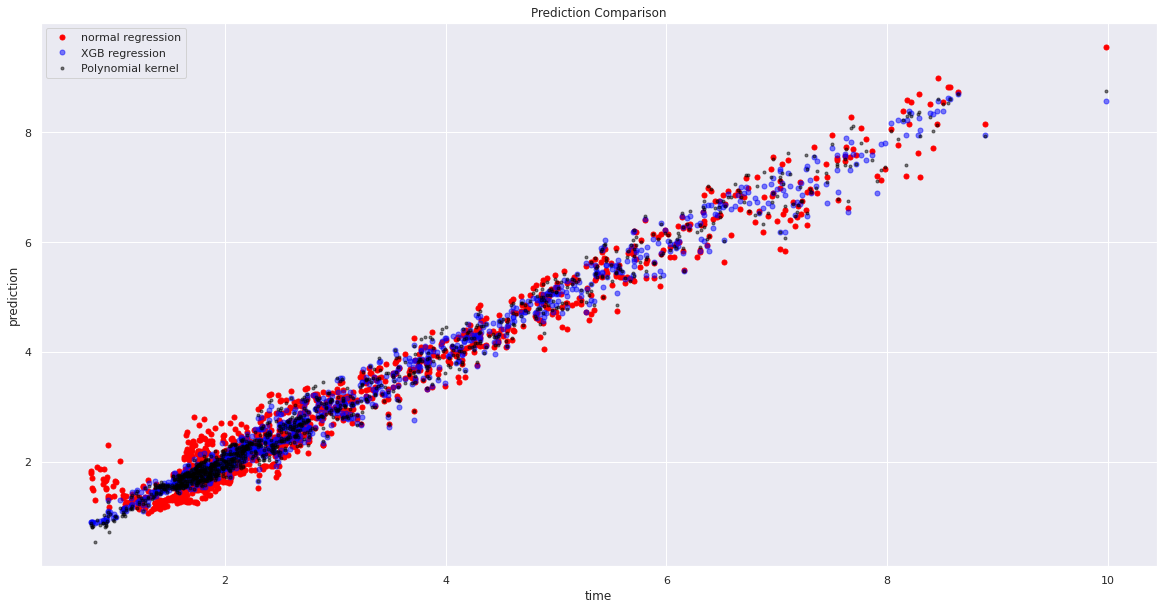

In [ ]:
#Comparative plot
import matplotlib.pyplot as plt


fig, ax1 = plt.subplots()
ax1.plot(data_test["time"], data_test["time_pred"], color = "red", label = "normal regression",linestyle='None', marker = "o", markersize = 5)
ax1.plot(data_test["time"], data_test["time_predXG"], color = "blue", label = "XGB regression",linestyle='None',marker = "o", markersize = 5, alpha= 0.5)
ax1.plot(data_test["time"], data_test["time_pred_ply"], color = "black", label = "Polynomial kernel",linestyle='None',marker = "o", markersize = 3, alpha= 0.5)


ax1.set_xlabel('time')
ax1.set_ylabel('prediction')
ax1.legend()
fig.set_figheight(10)
fig.set_figwidth(20)

plt.title('Prediction Comparison')
plt.show()